In [3]:
!pip install wordcloud


In [ ]:

# 1. Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Hiển thị đẹp
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,6)


# 2. Load dữ liệu

df_audio = pd.read_csv("../data/data-top50/france/spotify-streaming-top-50-france-with-audio.csv")
df_meta  = pd.read_csv("../data/data-top50/france/spotify-streaming-top-50-france-with-meta-clean.csv")

# Merge theo track_id hoặc spotify_id (nếu có)
df = pd.merge(df_meta, df_audio, on="track_id", how="inner")

print("Kích thước dữ liệu:", df.shape)
df.head()


Kích thước dữ liệu: (27468, 27)


,date,position,song,artist,track_id,popularity,duration_ms,is_explicit,album_id,release_date,...,key,liveness,loudness,mode,speechiness,tempo,valence,tempo_norm,loudness_norm,key_name
0,2023-05-18,1,LA RUE,No Limit & Gazo & Damso,7EO5oDxrq2dvYDgBjFvFYY,72,225137,1,7IaBlF8e6NvoKSiE0SXRP1,2023-05-11,...,2.0,0.1210,-8.531,0,0.239,137.929,0.613,0.490586,0.857817,D
1,2023-05-18,2,C'est carrÃ© le S,Naps,2UHSXPY5jSCpp3nzWHtaQv,74,201533,0,1rs3ZOltQ78YblG2YMIvRI,2023-04-28,...,0.0,0.0934,-4.276,1,0.125,135.033,0.872,0.477423,0.928733,C
2,2023-05-18,3,Freestyle LVL UP 1,Ninho,5WAqZjhyquaFf8zBZ1Stfd,76,114182,1,2g47iUsGXrIMZTGqMgGFyE,2023-05-02,...,4.0,0.0864,-7.034,0,0.254,93.771,0.725,0.289868,0.882767,E
3,2023-05-18,4,Bolide allemand,SDM,0EzNyXyU7gHzj2TN8qYThj,79,176746,1,69njUAy8iu7QDMUYRYTQc2,2022-12-02,...,4.0,0.1130,-7.473,0,0.160,131.825,0.645,0.462841,0.875450,E
4,2023-05-18,5,Freestyle LVL UP 2,Ninho,7DOqkqVZuvPhKIAtVXjZo1,71,149064,1,69poeNuEJvR2UGMqWDV8wF,2023-05-11,...,11.0,0.1820,-5.066,0,0.365,187.544,0.488,0.716109,0.915567,B


In [ ]:
df.info()
df.describe()
# thông tin dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27468 entries, 0 to 27467
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              27468 non-null  object 
 1   position          27468 non-null  int64  
 2   song              27467 non-null  object 
 3   artist            27468 non-null  object 
 4   track_id          27468 non-null  object 
 5   popularity        27468 non-null  int64  
 6   duration_ms       27468 non-null  int64  
 7   is_explicit       27468 non-null  int64  
 8   album_id          27468 non-null  object 
 9   release_date      27468 non-null  object 
 10  genres            27468 non-null  object 
 11  main_genre        27468 non-null  object 
 12  href              27468 non-null  object 
 13  acousticness      27468 non-null  float64
 14  danceability      27468 non-null  float64
 15  energy            27468 non-null  float64
 16  instrumentalness  27468 non-null  float6

,position,popularity,duration_ms,is_explicit,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,tempo_norm,loudness_norm
count,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000,27468.000000
mean,25.592326,76.699505,185761.012524,0.568334,0.299474,0.703219,0.657084,0.007602,5.456384,0.151476,-6.530053,0.307849,0.139019,123.742844,0.571375,0.426104,0.891166
std,14.433751,11.618299,32293.652853,0.495317,0.220126,0.124329,0.126585,0.054193,3.615105,0.108369,1.824776,0.461612,0.108316,22.353212,0.204608,0.101606,0.030413
min,1.000000,0.000000,0.000000,0.000000,0.000175,0.130000,0.084000,0.000000,0.000000,0.023200,-21.166000,0.000000,0.025600,59.129000,0.034400,0.132405,0.647233
25%,13.000000,71.000000,165775.000000,0.000000,0.117000,0.636000,0.586000,0.000000,2.000000,0.097500,-7.636000,0.000000,0.047700,110.012000,0.418000,0.363691,0.872733
50%,26.000000,75.000000,180000.000000,1.000000,0.277000,0.721000,0.662000,0.000002,5.137134,0.116000,-6.525000,0.000000,0.094200,123.994000,0.590000,0.427245,0.891250
75%,38.000000,84.000000,208405.000000,1.000000,0.436000,0.788000,0.736000,0.000256,9.000000,0.162488,-5.187000,1.000000,0.197000,136.938000,0.718000,0.486082,0.913550
max,50.000000,100.000000,547413.000000,1.000000,0.993000,0.959000,0.967000,0.941000,11.000000,0.913000,-2.018000,1.000000,0.706000,206.727000,0.981000,0.803305,0.966367


In [ ]:
print(df.isnull().sum())
# kiểm tra dữ liệu thiếu
print("Số bản ghi trùng lặp:", df.duplicated().sum())


date                0
position            0
song                1
artist              0
track_id            0
popularity          0
duration_ms         0
is_explicit         0
album_id            0
release_date        0
genres              0
main_genre          0
href                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
tempo_norm          0
loudness_norm       0
key_name            0
dtype: int64
Số bản ghi trùng lặp: 0


In [8]:
print("Số bài hát:", df['song'].nunique())
print("Số nghệ sĩ:", df['artist'].nunique())
print("Số album:", df['album_id'].nunique())


Số bài hát: 686
Số nghệ sĩ: 323
Số album: 412


C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\3537257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette="viridis")


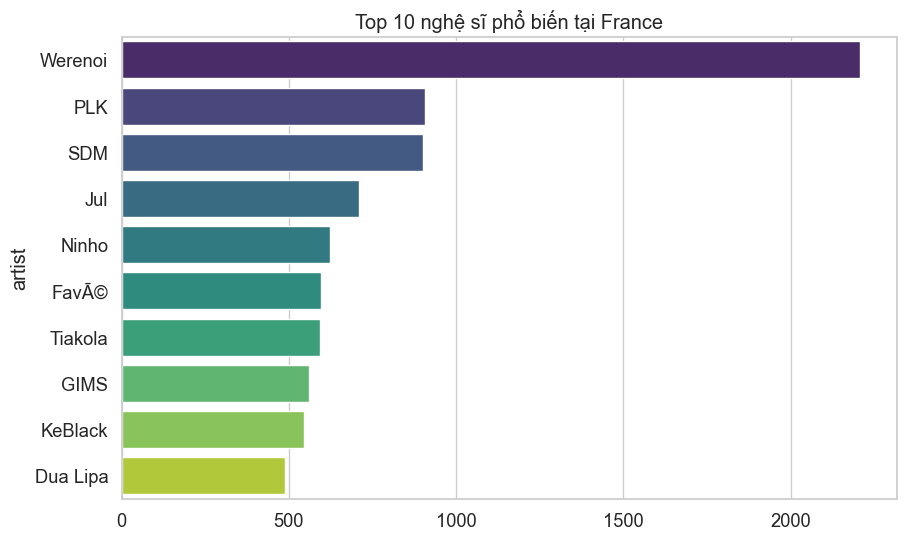

In [9]:
#top 10 nghệ sĩ xuất hiện nhiều nhất
top_artists = df['artist'].value_counts().head(10)
sns.barplot(y=top_artists.index, x=top_artists.values, palette="viridis")
plt.title("Top 10 nghệ sĩ phổ biến tại France")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\3672620135.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_genres, x='Count', y='Genre', palette="viridis")


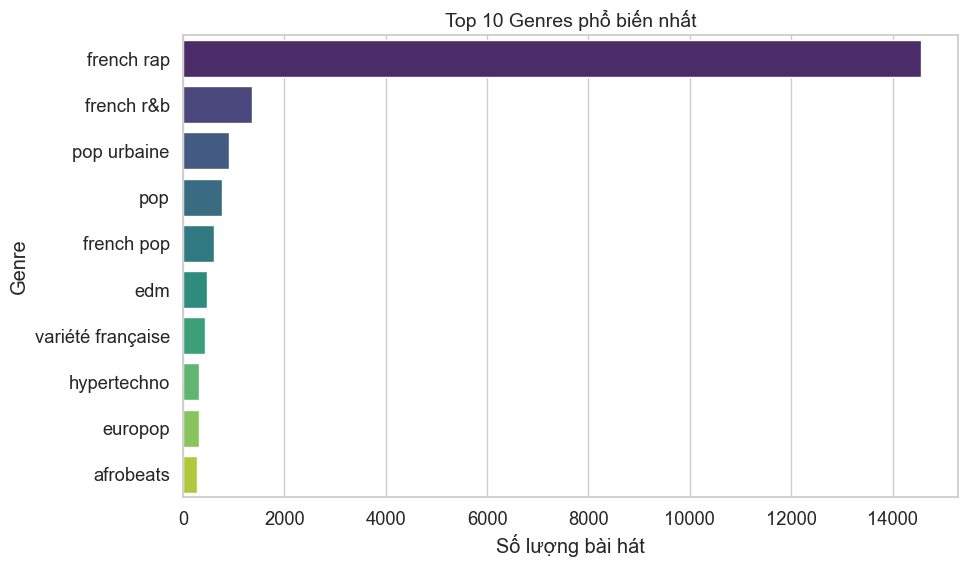

,Genre,Count
0,french rap,14563
1,french r&b,1370
2,pop urbaine,907
3,pop,769
4,french pop,619
5,edm,468
6,variété française,441
7,hypertechno,310
8,europop,308
9,afrobeats,286


In [16]:
# Top 10 genres phổ biến nhất
# Bỏ giá trị unknown
df_genre = df[df['main_genre'] != "unknown"]

# Top 10 genres
top10_genres = (df_genre['main_genre']
                .value_counts()
                .head(10)
                .reset_index())
top10_genres.columns = ['Genre', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top10_genres, x='Count', y='Genre', palette="viridis")
plt.title("Top 10 Genres phổ biến nhất", fontsize=14)
plt.xlabel("Số lượng bài hát")
plt.ylabel("Genre")
plt.show()

top10_genres



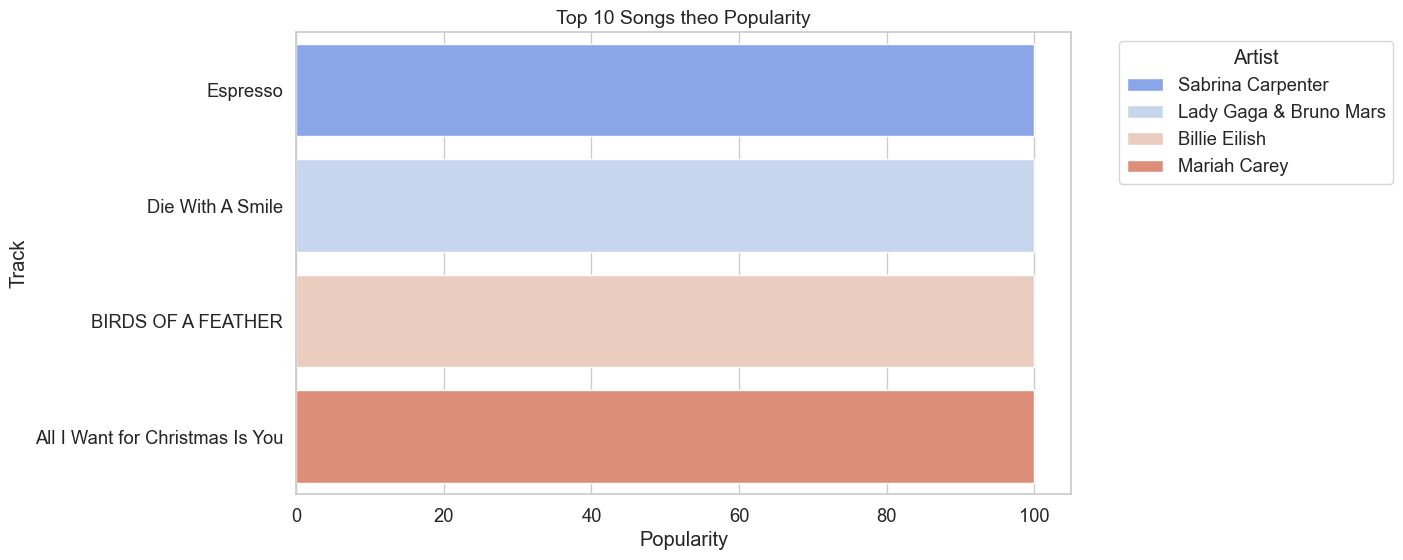

,track_id,song,artist,popularity
0,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,100
1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,Lady Gaga & Bruno Mars,100
2,2plbrEY59IikOBgBGLjaoe,Die With A Smile,Lady Gaga & Bruno Mars,100
3,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,100
4,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,Mariah Carey,100
5,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,100
6,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,Mariah Carey,100
7,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,100
8,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,100
9,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,100


In [15]:
# Top 10 bài hát theo Popularity (hoặc Streams nếu có)
if 'popularity' in df.columns:
    metric = 'popularity'
else:
    metric = 'streams'

top10_songs = (df[['track_id','song', 'artist', metric]]
               .sort_values(by=metric, ascending=False)
               .head(10)
               .reset_index(drop=True))

plt.figure(figsize=(10,6))
sns.barplot(data=top10_songs, x=metric, y='song', hue='artist', dodge=False, palette="coolwarm")
plt.title(f"Top 10 Songs theo {metric.capitalize()}", fontsize=14)
plt.xlabel(metric.capitalize())
plt.ylabel("Track")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

top10_songs


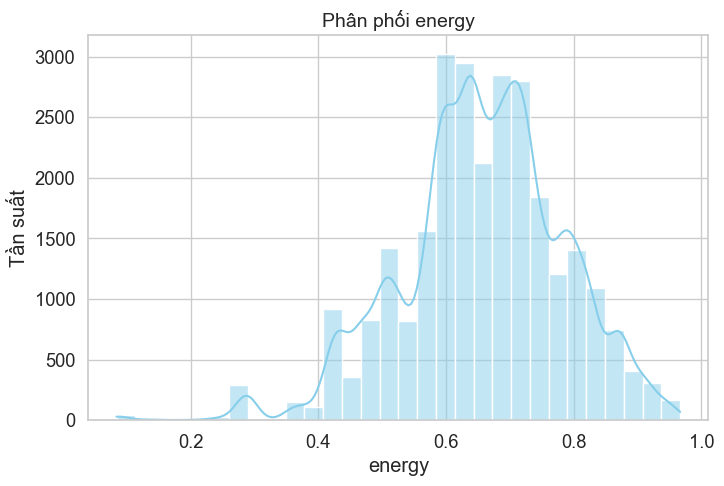

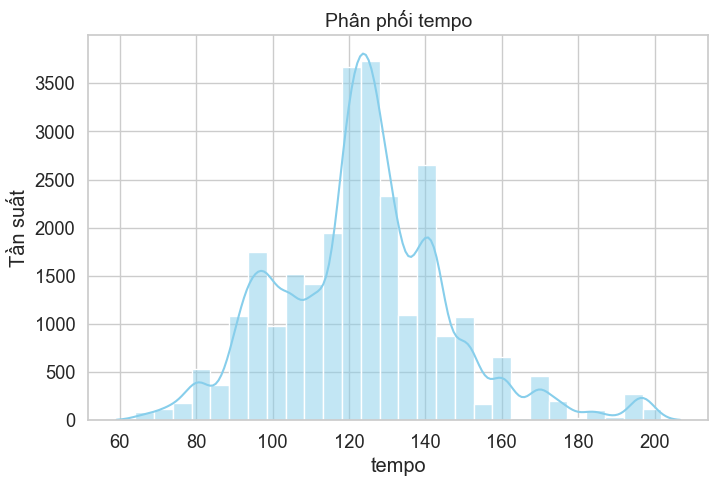

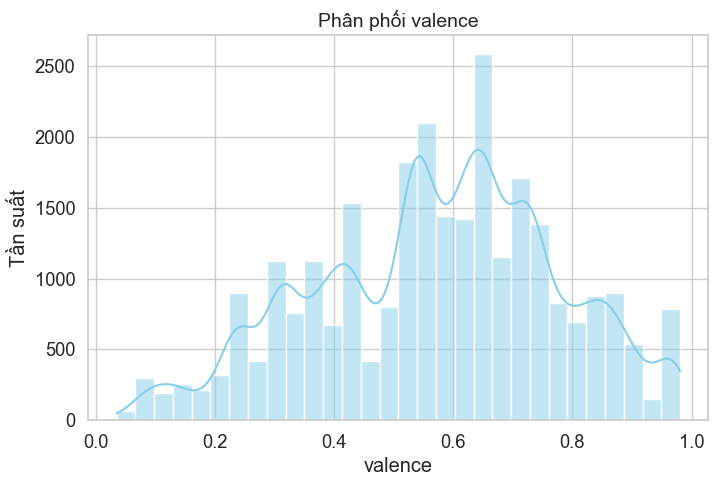

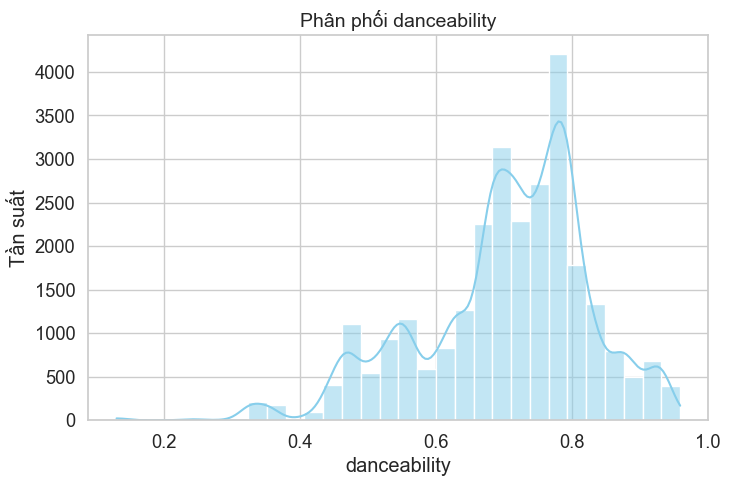

In [17]:
# Danh sách các đặc trưng muốn phân tích
features = ["energy", "tempo", "valence", "danceability"]

for f in features:
    plt.figure(figsize=(8,5))
    sns.histplot(df[f], kde=True, bins=30, color="skyblue")
    plt.title(f"Phân phối {f}", fontsize=14)
    plt.xlabel(f)
    plt.ylabel("Tần suất")
    plt.show()


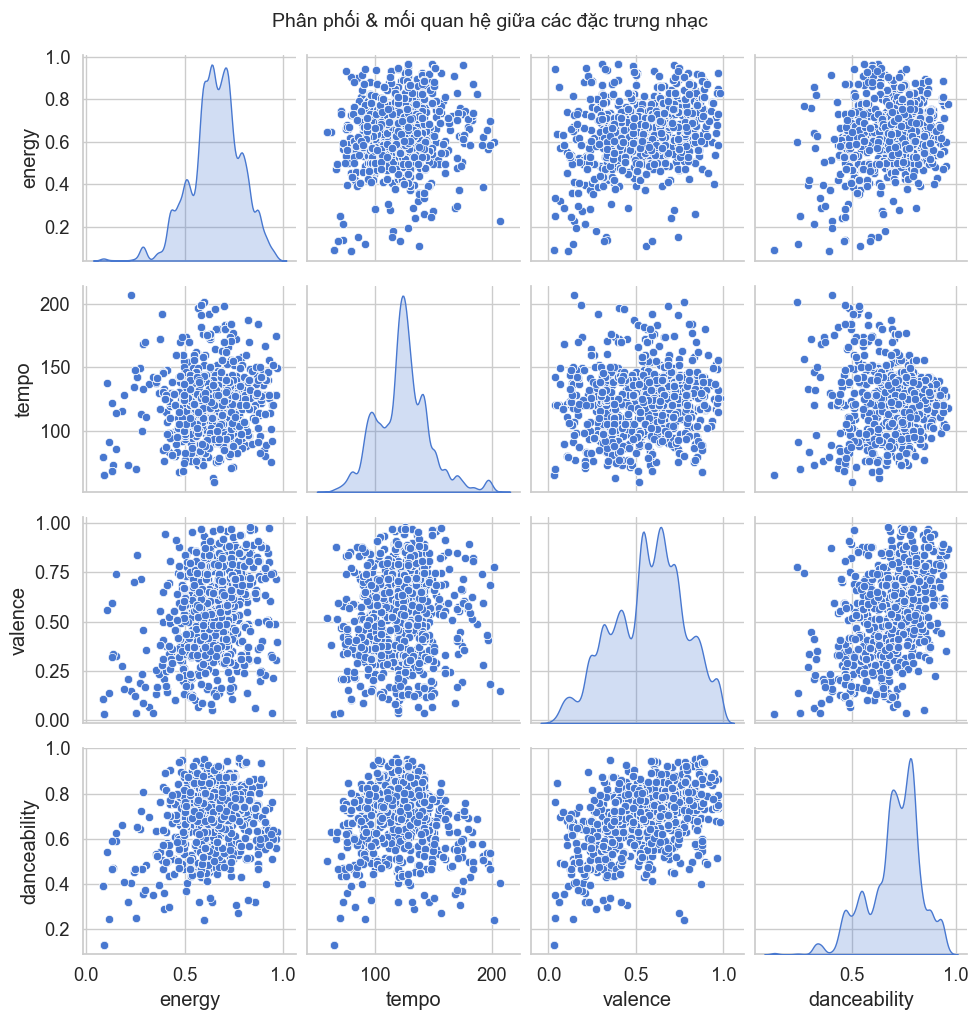

In [18]:
# Ma trận hiệp phương sai
sns.pairplot(df[["energy", "tempo", "valence", "danceability"]], diag_kind="kde")
plt.suptitle("Phân phối & mối quan hệ giữa các đặc trưng nhạc", y=1.02, fontsize=14)
plt.show()


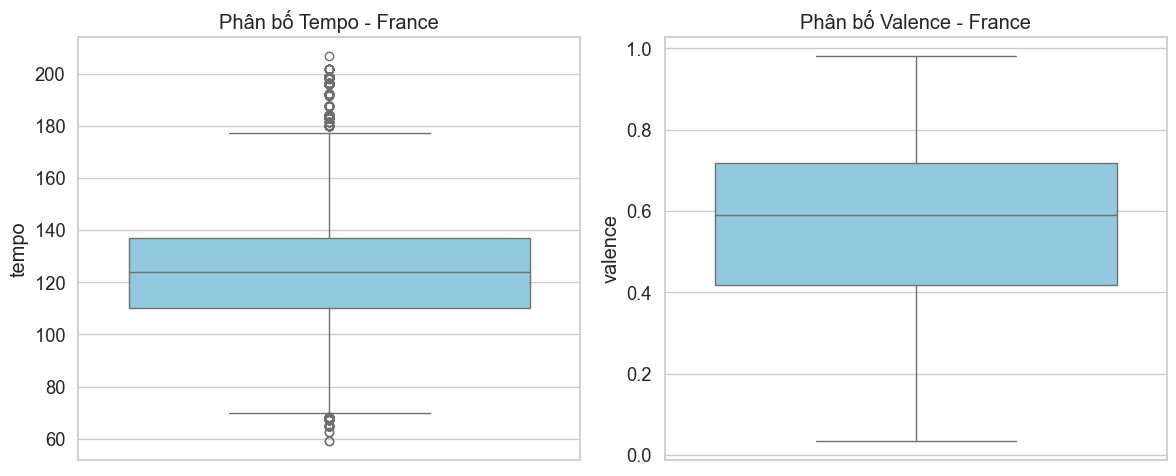

In [21]:
features = ["tempo", "valence"]

plt.figure(figsize=(12,5))
for i, col in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Phân bố {col.capitalize()} - France")
plt.tight_layout()
plt.show()



In [26]:
!pip install scikit-learn


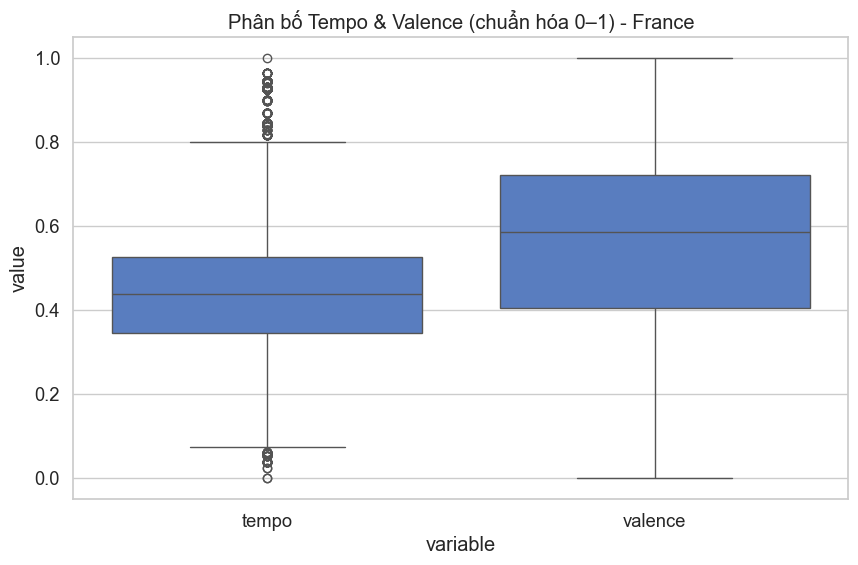

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[["tempo", "valence"]])
scaled_df = pd.DataFrame(scaled, columns=["tempo", "valence"])

sns.boxplot(x="variable", y="value", data=pd.melt(scaled_df))
plt.title("Phân bố Tempo & Valence (chuẩn hóa 0–1) - France")
plt.show()


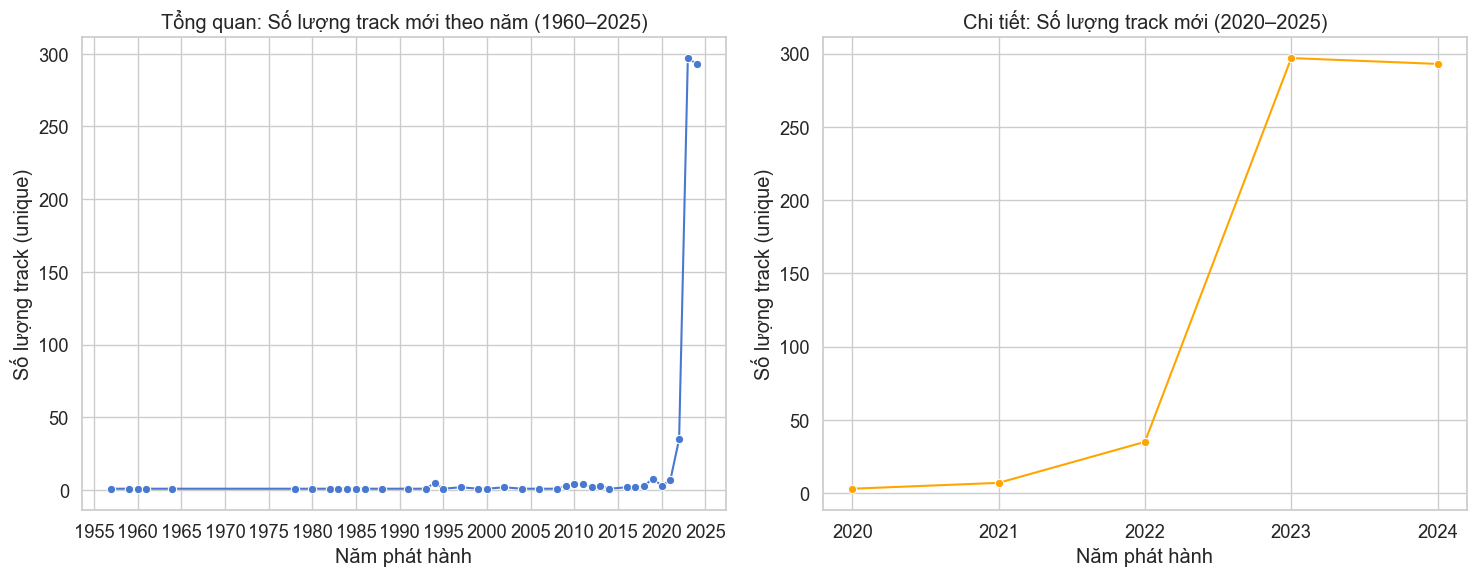

In [33]:
import matplotlib.ticker as mticker

# --- Toàn bộ dữ liệu ---
plt.figure(figsize=(15,6))

# Subplot 1: Toàn bộ từ 1960
plt.subplot(1,2,1)
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker="o")
plt.title("Tổng quan: Số lượng track mới theo năm (1960–2025)")
plt.xlabel("Năm phát hành")
plt.ylabel("Số lượng track (unique)")
plt.grid(True)

# Để tránh quá dày, hiển thị tick mỗi 5 năm
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

# Subplot 2: Chi tiết từ 2020
tracks_recent = tracks_per_year[tracks_per_year.index >= 2020]

plt.subplot(1,2,2)
sns.lineplot(x=tracks_recent.index, y=tracks_recent.values, marker="o", color="orange")
plt.title("Chi tiết: Số lượng track mới (2020–2025)")
plt.xlabel("Năm phát hành")
plt.ylabel("Số lượng track (unique)")
plt.grid(True)

# Hiển thị tất cả năm trong giai đoạn 2020–2025
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.tight_layout()
plt.show()


Tổng cộng dataset có 556 tuần BXH


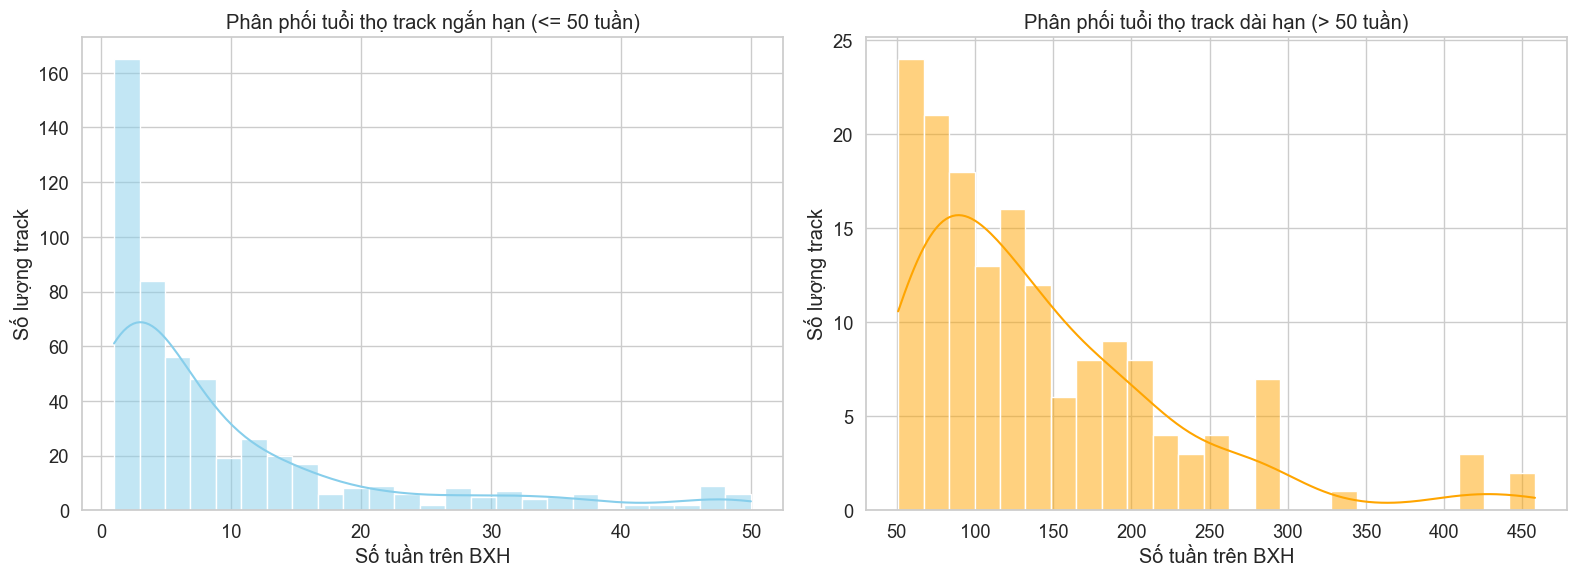

In [40]:

# Tổng số tuần có trong dataset (tính trên toàn bộ BXH)
total_weeks = df['date'].nunique()
print(f"Tổng cộng dataset có {total_weeks} tuần BXH")

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Histogram cho track <= 50 tuần
sns.histplot(track_lifetime[track_lifetime['weeks_on_chart'] <= 50]['weeks_on_chart'], 
             bins=25, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Phân phối tuổi thọ track ngắn hạn (<= 50 tuần)")
axes[0].set_xlabel("Số tuần trên BXH")
axes[0].set_ylabel("Số lượng track")

# Histogram cho track > 50 tuần
sns.histplot(track_lifetime[track_lifetime['weeks_on_chart'] > 50]['weeks_on_chart'], 
             bins=25, kde=True, ax=axes[1], color="orange")
axes[1].set_title("Phân phối tuổi thọ track dài hạn (> 50 tuần)")
axes[1].set_xlabel("Số tuần trên BXH")
axes[1].set_ylabel("Số lượng track")

plt.tight_layout()
plt.show()




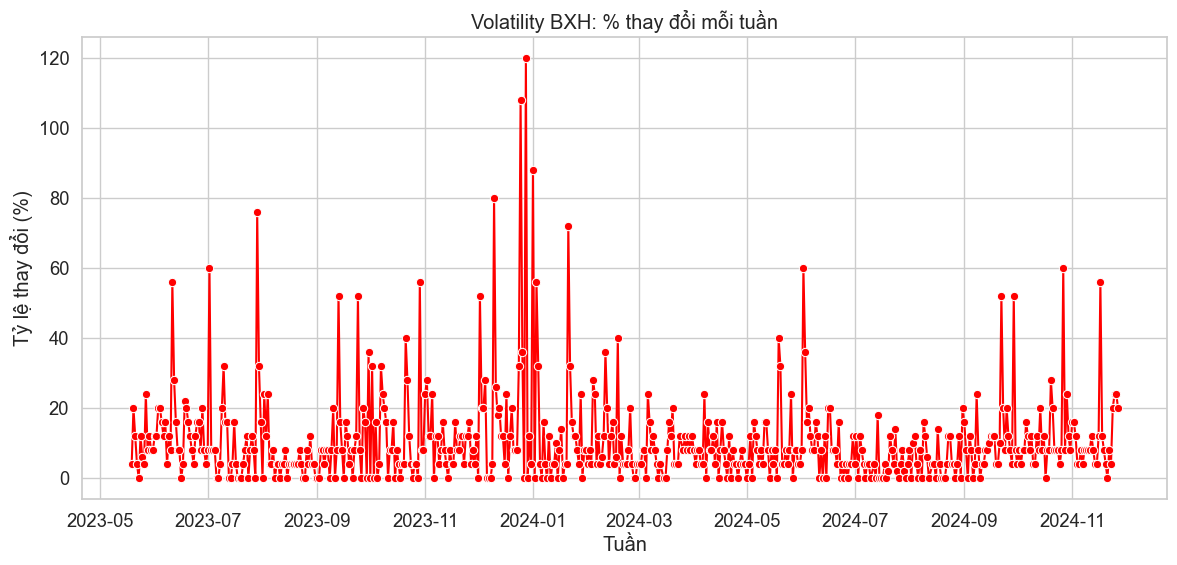

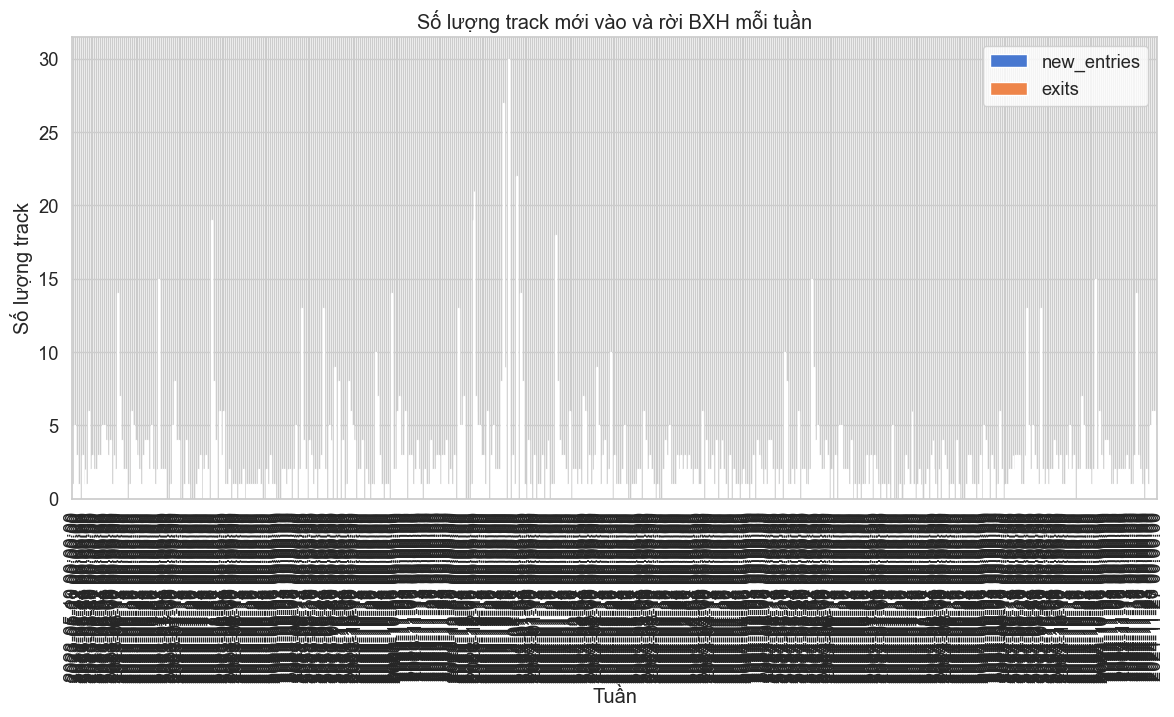

In [79]:
# Chuẩn bị dữ liệu: mỗi tuần 50 bài
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values(['date','position'])

# Nhóm theo tuần
weeks = sorted(df['date'].unique())

volatility_data = []

for i in range(1, len(weeks)):
    this_week = df[df['date'] == weeks[i]]['track_id'].unique()
    prev_week = df[df['date'] == weeks[i-1]]['track_id'].unique()
    
    # Track mới lọt BXH tuần này
    new_entries = len(set(this_week) - set(prev_week))
    # Track rơi khỏi BXH tuần này
    exits = len(set(prev_week) - set(this_week))
    # Tỷ lệ biến động
    volatility = (new_entries + exits) / 50 * 100
    
    volatility_data.append({
        'week': weeks[i],
        'new_entries': new_entries,
        'exits': exits,
        'volatility_pct': volatility
    })

vol_df = pd.DataFrame(volatility_data)

# --- Visualization ---
plt.figure(figsize=(14,6))
sns.lineplot(data=vol_df, x='week', y='volatility_pct', marker="o", color="red")
plt.title("Volatility BXH: % thay đổi mỗi tuần")
plt.xlabel("Tuần")
plt.ylabel("Tỷ lệ thay đổi (%)")
plt.grid(True)
plt.show()

# Biểu đồ số lượng track vào/ra
vol_df.set_index('week')[['new_entries','exits']].plot(kind='bar', stacked=False, figsize=(14,6))
plt.title("Số lượng track mới vào và rời BXH mỗi tuần")
plt.ylabel("Số lượng track")
plt.xlabel("Tuần")
plt.show()


Top 5 track trụ lâu nhất trên BXH:
                 track_id             song                      artist  \
0  7wOgZ1otoKYDvKyQKP1sNZ      Laboratoire                     Werenoi   
1  7wOgZ1otoKYDvKyQKP1sNZ      Laboratoire                     Werenoi   
2  0EzNyXyU7gHzj2TN8qYThj  Bolide allemand                         SDM   
3  2PWJx5FwMrMVEaTjwYait1        Flashback                FavÃ© & Gazo   
4  2PWJx5FwMrMVEaTjwYait1        FLASHBACK                       FavÃ©   
5  30D9x5LFgL2o9xidjX2wtE         Casanova             Soolking & Gazo   
6  1eldTykrnkEBLX41bk5eMw     Petit gÃ©nie  Jungeli & Imen Es & Alonzo   
7  1eldTykrnkEBLX41bk5eMw     Petit gÃ©nie                     Jungeli   

   main_genre  weeks_on_chart release_date  
0  french rap             458   2023-03-10  
1  french rap             458   2023-03-09  
2  french rap             454   2022-12-02  
3  french rap             423   2023-09-15  
4  french rap             423   2023-10-13  
5  french rap             41

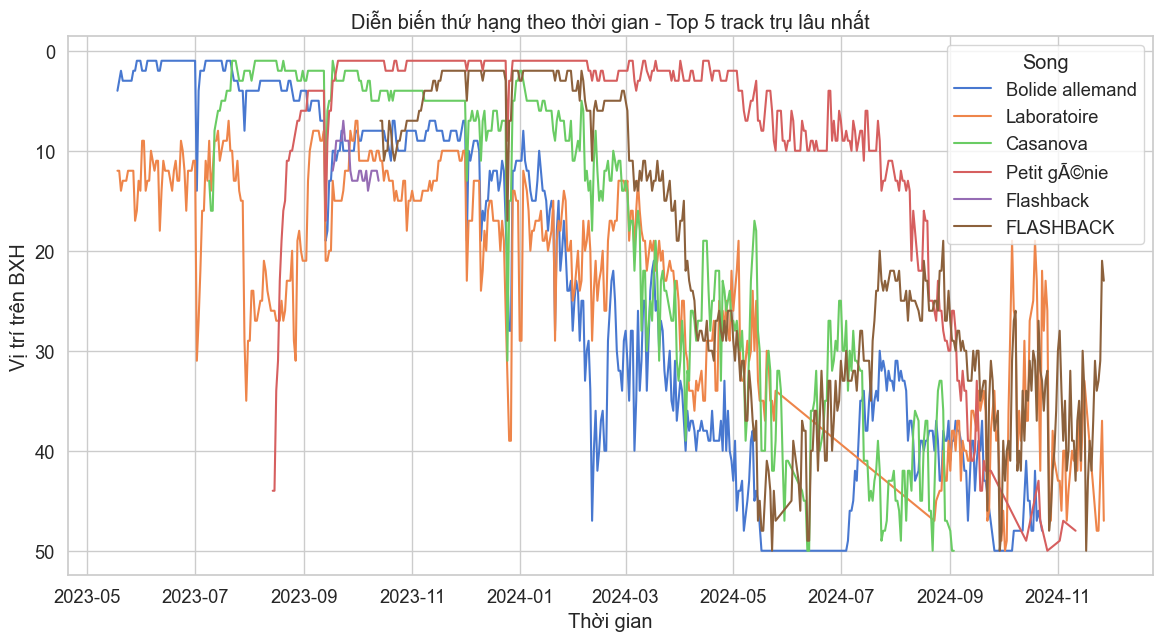

In [42]:
# Số tuần mỗi track tồn tại
track_lifetime = df.groupby('track_id')['date'].nunique().reset_index()
track_lifetime.columns = ['track_id', 'weeks_on_chart']

# Merge lại để lấy thêm thông tin bài hát
df_top5 = track_lifetime.sort_values(by='weeks_on_chart', ascending=False).head(5)
df_top5 = df_top5.merge(df[['track_id','song','artist','main_genre', 'release_date']].drop_duplicates(),
                        on='track_id', how='left')

print("Top 5 track trụ lâu nhất trên BXH:")
print(df_top5[['track_id','song','artist','main_genre','weeks_on_chart', 'release_date']])

plt.figure(figsize=(14,7))

# Lọc dữ liệu chỉ gồm top 5
df_top5_tracks = df[df['track_id'].isin(df_top5['track_id'])]

# Vẽ line chart
sns.lineplot(data=df_top5_tracks, x='date', y='position', hue='song')

# Đảo ngược trục Y vì hạng 1 là top
plt.gca().invert_yaxis()

plt.title("Diễn biến thứ hạng theo thời gian - Top 5 track trụ lâu nhất")
plt.xlabel("Thời gian")
plt.ylabel("Vị trí trên BXH")
plt.legend(title="Song")
plt.show()


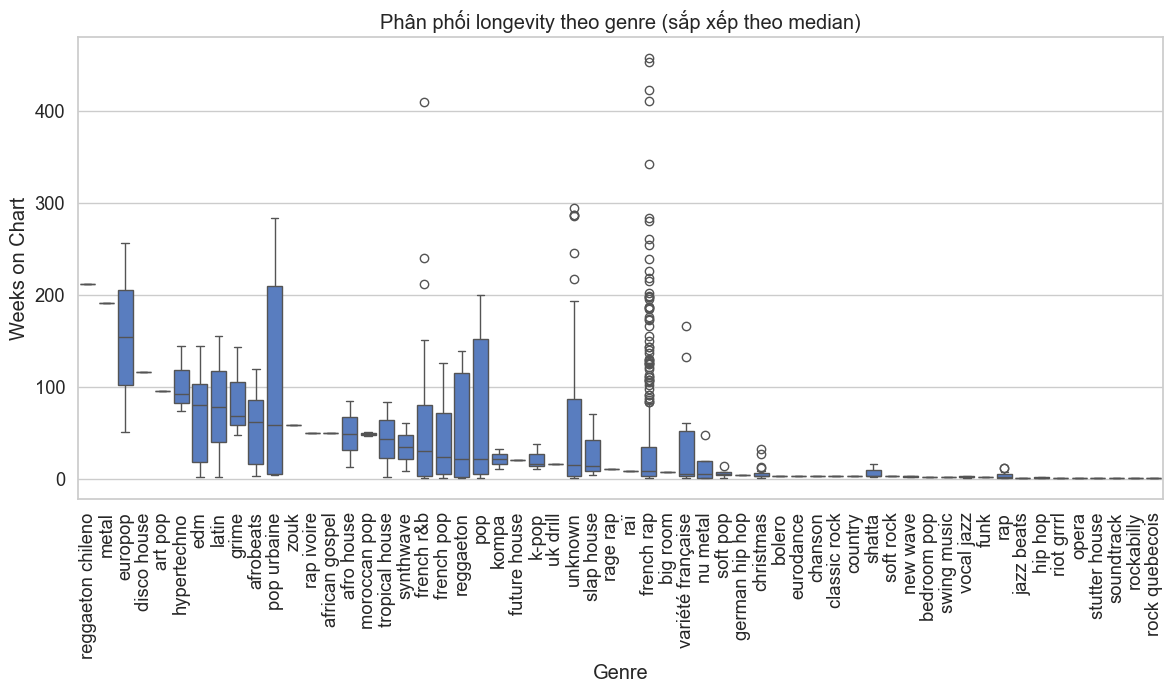

In [48]:
# Tính median longevity theo genre để sắp xếp
order = df_longevity.groupby("main_genre")["weeks_on_chart"].median().sort_values(ascending=False).index

plt.figure(figsize=(14,6))
sns.boxplot(data=df_longevity, x="main_genre", y="weeks_on_chart", order=order)
plt.xticks(rotation=90)
plt.title("Phân phối longevity theo genre (sắp xếp theo median)")
plt.xlabel("Genre")
plt.ylabel("Weeks on Chart")
plt.show()



C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\1321444885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_longevity[df_longevity['main_genre'].isin(top10_genres)],


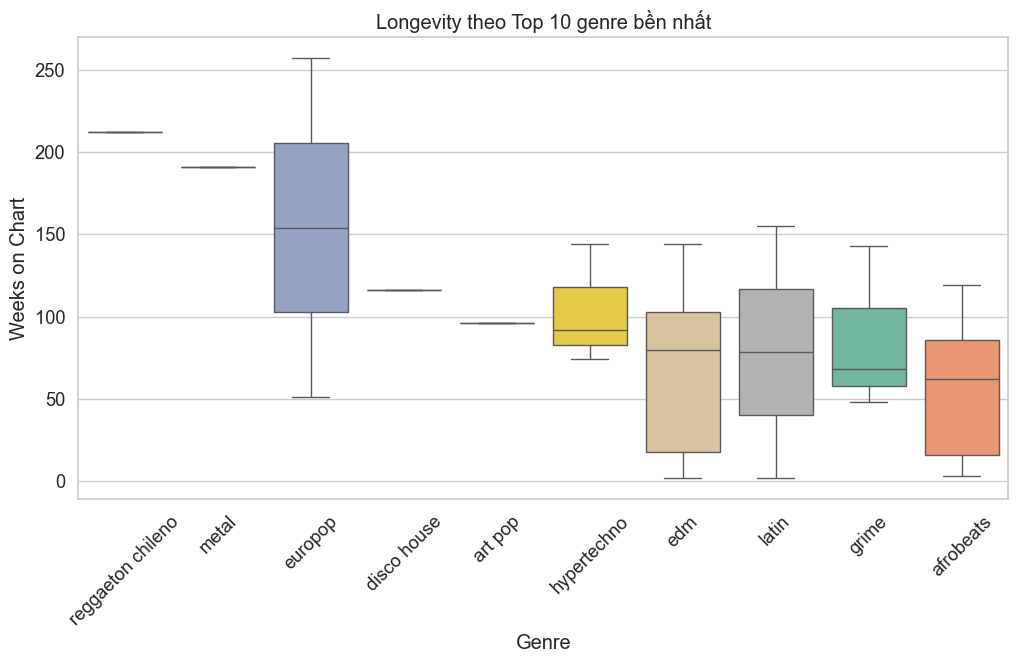

In [50]:
top10_genres = order[:10]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_longevity[df_longevity['main_genre'].isin(top10_genres)], 
            x="main_genre", y="weeks_on_chart", order=top10_genres, palette="Set2")
plt.xticks(rotation=45)
plt.title("Longevity theo Top 10 genre bền nhất")
plt.xlabel("Genre")
plt.ylabel("Weeks on Chart")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\116059803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_longevity, x="main_genre", y="weeks_on_chart", order=order, palette="Set3")


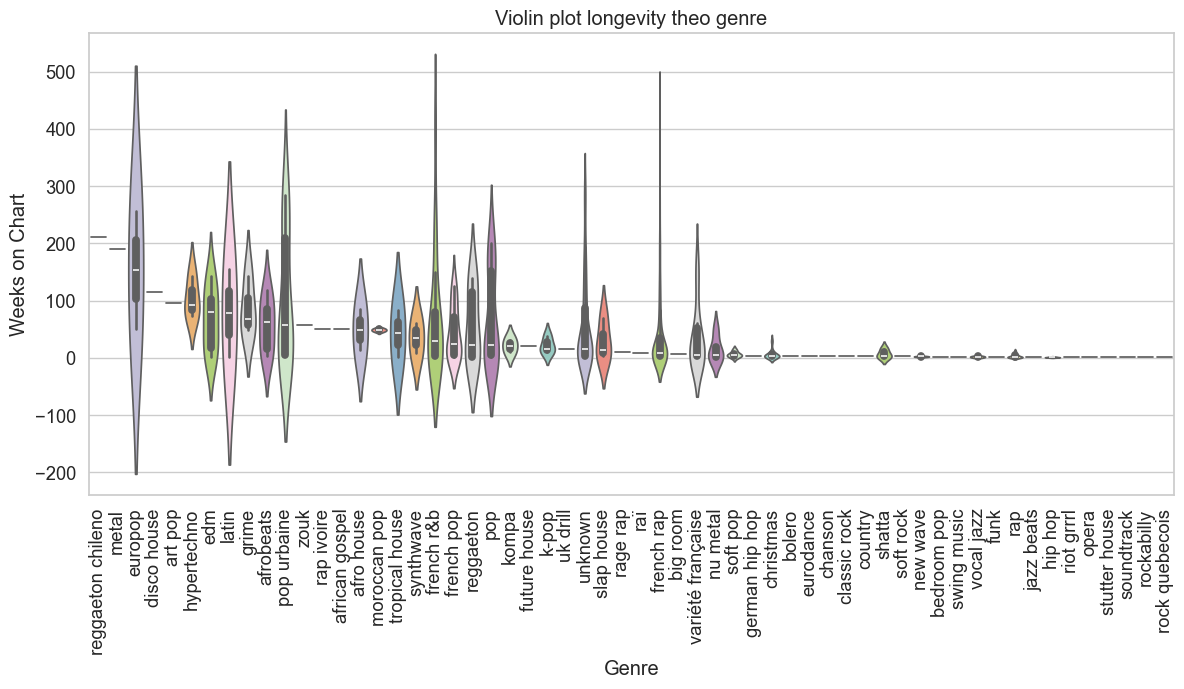

In [51]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df_longevity, x="main_genre", y="weeks_on_chart", order=order, palette="Set3")
plt.xticks(rotation=90)
plt.title("Violin plot longevity theo genre")
plt.xlabel("Genre")
plt.ylabel("Weeks on Chart")
plt.show()


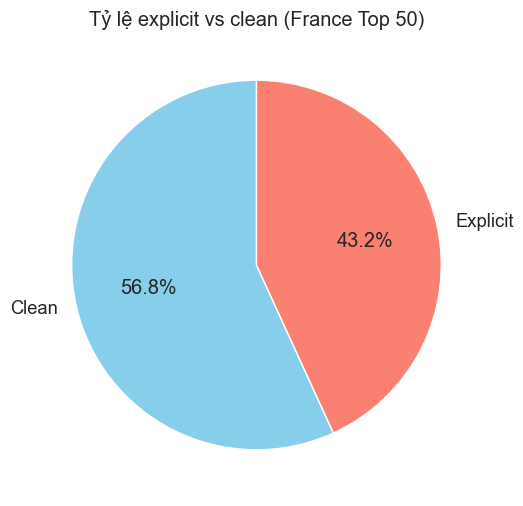

In [52]:
# Tỷ lệ explicit vs clean
explicit_counts = df['is_explicit'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(explicit_counts, labels=['Clean','Explicit'], autopct='%1.1f%%', startangle=90, colors=["skyblue","salmon"])
plt.title("Tỷ lệ explicit vs clean (France Top 50)")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\55758468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2")
C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\55758468.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2")


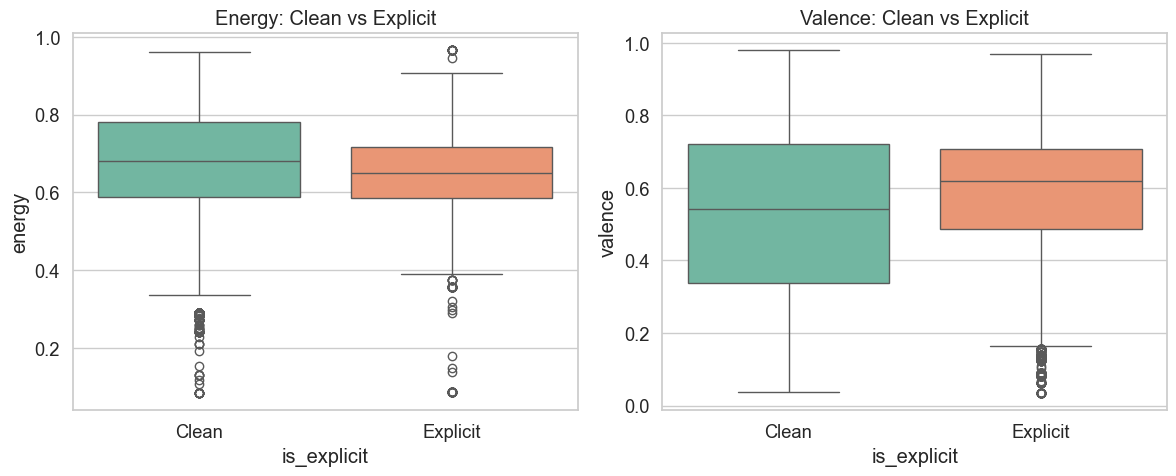

In [53]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2")
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Energy: Clean vs Explicit")

plt.subplot(1,2,2)
sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2")
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Valence: Clean vs Explicit")

plt.tight_layout()
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\2690721925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=track_lifetime, x='is_explicit', y='weeks_on_chart', palette="Set1")


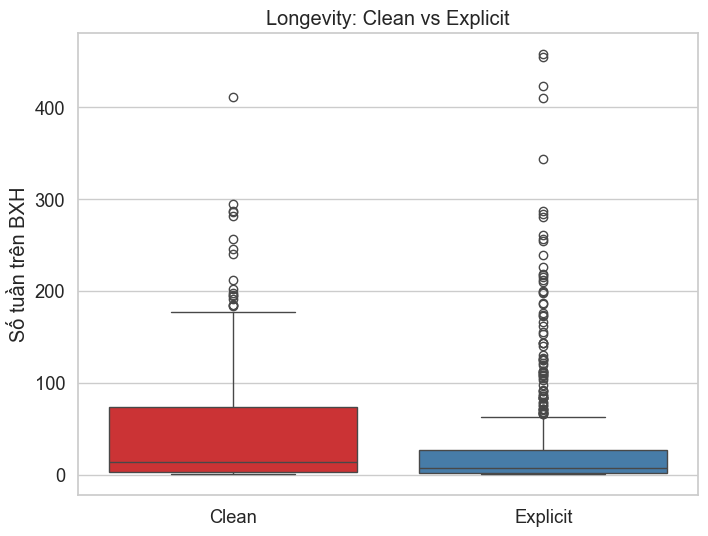

Tuổi thọ trung bình:
is_explicit
0    50.241525
1    34.558758
Name: weeks_on_chart, dtype: float64


In [54]:
# Longevity từng track
track_lifetime = df.groupby(['track_id','is_explicit'])['date'].nunique().reset_index()
track_lifetime.columns = ['track_id','is_explicit','weeks_on_chart']

plt.figure(figsize=(8,6))
sns.boxplot(data=track_lifetime, x='is_explicit', y='weeks_on_chart', palette="Set1")
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Longevity: Clean vs Explicit")
plt.xlabel("")
plt.ylabel("Số tuần trên BXH")
plt.show()

print("Tuổi thọ trung bình:")
print(track_lifetime.groupby('is_explicit')['weeks_on_chart'].mean())


C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\4287660279.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_explicit.values, y=top_genres_explicit.index, palette="coolwarm")


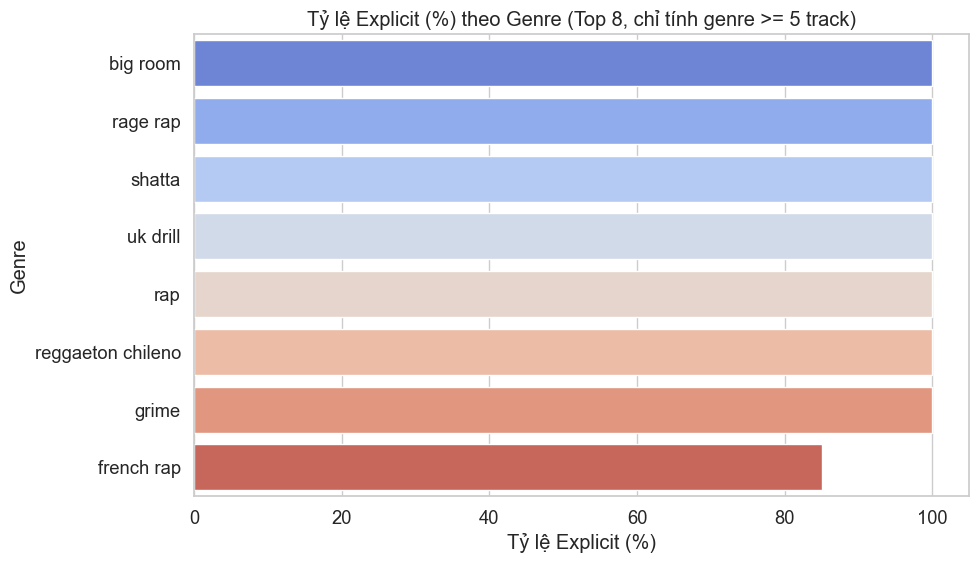

In [68]:
genre_count = df['main_genre'].value_counts()
valid_genres = genre_count[genre_count >= 5].index

genre_explicit = df[df['main_genre'].isin(valid_genres)].groupby('main_genre')['is_explicit'].mean().sort_values(ascending=False) * 100
top_genres_explicit = genre_explicit.head(8)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres_explicit.values, y=top_genres_explicit.index, palette="coolwarm")
plt.title("Tỷ lệ Explicit (%) theo Genre (Top 8, chỉ tính genre >= 5 track)")
plt.xlabel("Tỷ lệ Explicit (%)")
plt.ylabel("Genre")
plt.show()





C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\1270854213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2", ax=axes[0])
C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\1270854213.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Clean","Explicit"])
C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\1270854213.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2", ax=axes[1])
C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\1270854213.py:8: UserWarning: set_ticklabels()

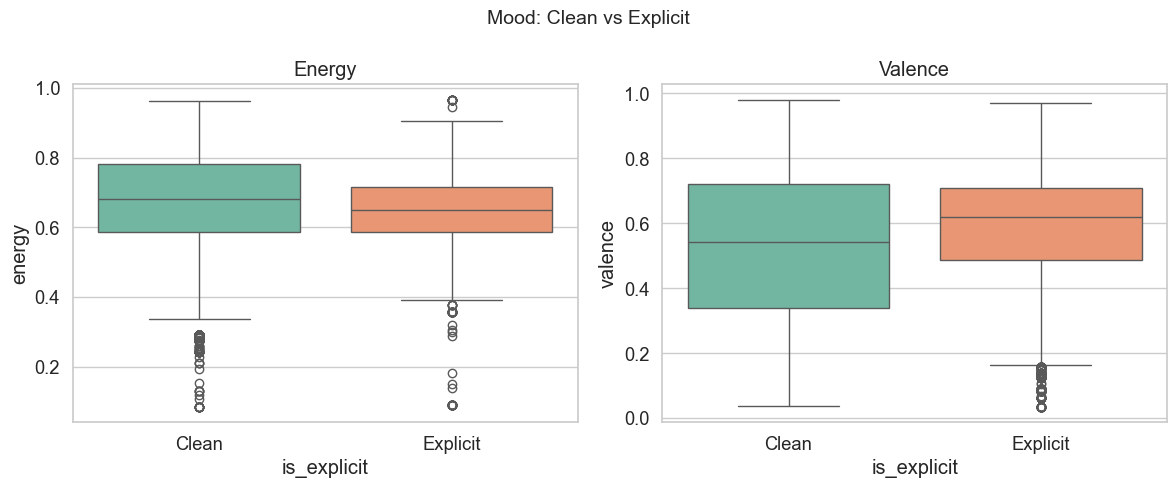

In [61]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2", ax=axes[0])
axes[0].set_xticklabels(["Clean","Explicit"])
axes[0].set_title("Energy")

sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2", ax=axes[1])
axes[1].set_xticklabels(["Clean","Explicit"])
axes[1].set_title("Valence")

fig.suptitle("Mood: Clean vs Explicit", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_15056\4157252350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=track_best, x='is_explicit', y='best_rank', palette="Set3")


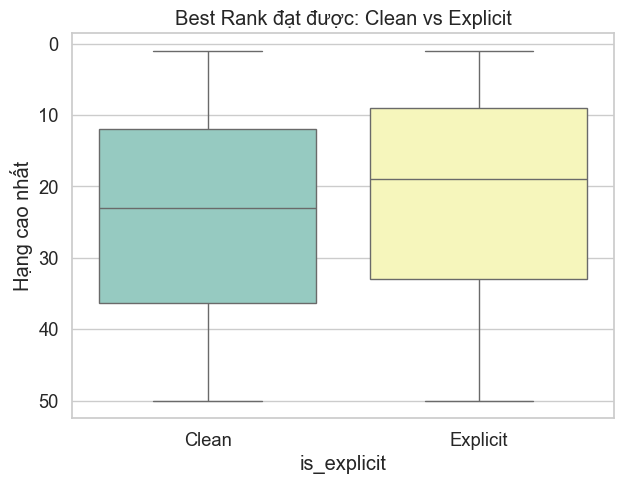

In [70]:
track_best = df.groupby(['track_id','is_explicit'])['position'].min().reset_index()
track_best.columns = ['track_id','is_explicit','best_rank']

plt.figure(figsize=(7,5))
sns.boxplot(data=track_best, x='is_explicit', y='best_rank', palette="Set3")
plt.gca().invert_yaxis()  # rank 1 trên cùng
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Best Rank đạt được: Clean vs Explicit")
plt.ylabel("Hạng cao nhất")
plt.show()
